In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np

In [45]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
import datetime as dt
import plotly.io as pio

In [46]:
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
from IPython.display import display, clear_output

In [47]:
res=widgets.Text(placeholder='Yes/No')

In [48]:
button_send=widgets.Button(description='Submit', tooltip='Submit',style={'description_width': 'initial'})
output=widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Successfully submitted your response.")
        #print(f"Hi {name.value}")
        if res.value=='Yes':
            print("Take Care! Please do have a look at our Vaccination portal.")
        else:
            print("Congratulations! Please make sure that you stay at home and wear the mask.")
        
button_send.on_click(on_button_clicked)
vbox_result=widgets.VBox([button_send,output])

In [49]:
text_0=widgets.HTML(value="<h1>Welcome to COVID-19 Dashboard</h1>")
text_1=widgets.HTML(value="<h4>Are you COVID-19 Positive?</h4>")
vbox_text=widgets.VBox([text_0,text_1,res,vbox_result])

In [50]:
page=widgets.HBox([vbox_text])
display(page)

In [51]:
fp=r'C:/Users/Prijita/Downloads/Assign5/india-polygon.shp'
data=gpd.read_file(fp)

In [52]:
df=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Statewise.csv")

In [53]:
df['Negative']=df['Negative'].replace(np.nan,0)

In [54]:
state=df.drop(columns=['Date'])

In [55]:
st=state.groupby('State').sum()['TotalSamples'].reset_index()

In [56]:
sta=state.groupby('State').sum()['Positive'].reset_index()

In [57]:
stat=pd.merge(st,sta,on='State')

In [58]:
df1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/covid_19_india.csv")

In [59]:
covid=df1.drop(columns=['Sno','Date','Time','ConfirmedForeignNational','ConfirmedIndianNational'])

In [60]:
covid=covid.replace('Telengana','Telangana')
covid=covid.replace('Telengana***','Telangana')
covid=covid.replace('Telangana***','Telangana')
covid=covid.replace('Maharashtra***','Maharashtra')
covid=covid.replace('Chandigarh***','Chandigarh')
covid=covid.replace('Punjab***','Punjab')

In [61]:
co=covid.groupby('State/UnionTerritory').sum()['Cured'].reset_index()

In [62]:
cov=covid.groupby('State/UnionTerritory').sum()['Deaths'].reset_index()

In [63]:
df_fi=covid.groupby('State/UnionTerritory').sum()['Confirmed'].reset_index()

In [64]:
mer=pd.merge(co,cov,on='State/UnionTerritory')

In [65]:
merged=pd.merge(mer,df_fi,on='State/UnionTerritory')

In [66]:
dat=data.drop(columns=['id'])

In [67]:
dat.sort_values(by=['st_nm'],inplace=True)

In [68]:
merged1=merged.set_index('State/UnionTerritory').join(dat.set_index('st_nm'))

In [69]:
merged3=stat.set_index('State').join(dat.set_index('st_nm'))

In [70]:
from geopandas import GeoDataFrame
merged4=GeoDataFrame(merged3)

### Total Cases of COVID-19 in India

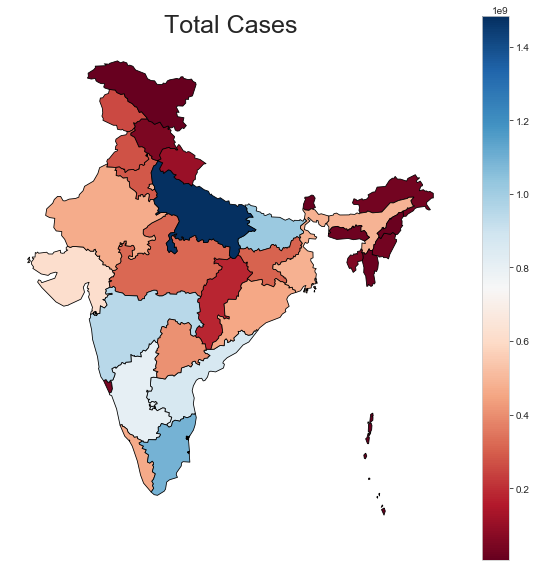

In [71]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('Total Cases',fontdict={'fontsize':'25','fontweight':'10'})
variable='TotalSamples'
merged4.plot(column=variable,cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [72]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=state['State'],
    z=state['TotalSamples'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Total Samples"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=500000,
        dtick=5000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Cases",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Total Positive of COVID-19 in India

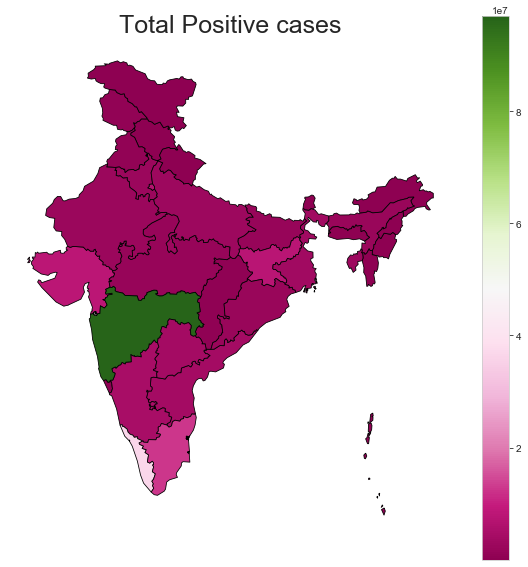

In [73]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('Total Positive cases',fontdict={'fontsize':'25','fontweight':'10'})
variable='Positive'
merged4.plot(column=variable,cmap='PiYG', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [74]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=state['State'],
    z=state['Positive'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Positive"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=50000,
        dtick=500000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Positive cases",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Total Death Cases of COVID-19 in India

In [75]:
from geopandas import GeoDataFrame
merged2=GeoDataFrame(merged1)

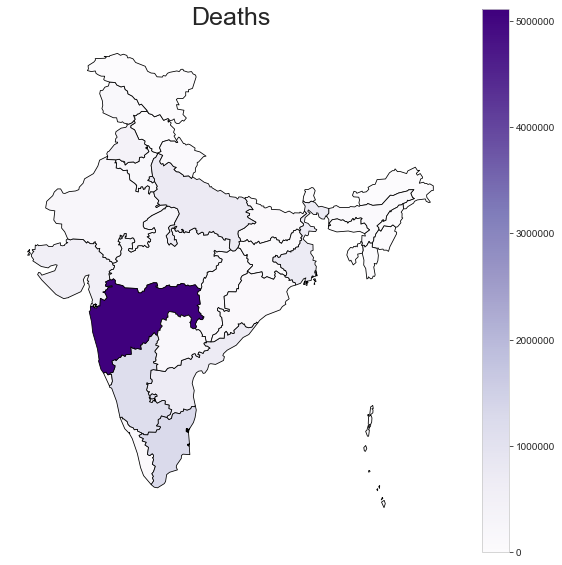

In [76]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('Deaths',fontdict={'fontsize':'25','fontweight':'10'})
variable='Deaths'
merged2.plot(column=variable,cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [77]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=merged['State/UnionTerritory'],
    z=merged['Deaths'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Positive"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=50000,
        dtick=500000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Death cases",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Total Cured Cases of COVID-19 in India

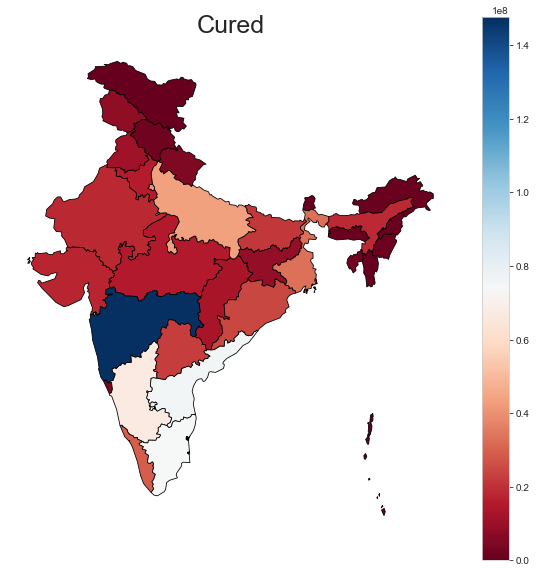

In [78]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('Cured',fontdict={'fontsize':'25','fontweight':'10'})
variable='Cured'
merged2.plot(column=variable,cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [79]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=merged['State/UnionTerritory'],
    z=merged['Cured'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Positive"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=5000000,
        dtick=50000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Cured cases",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Total Confirmed Cases of COVID-19 in India

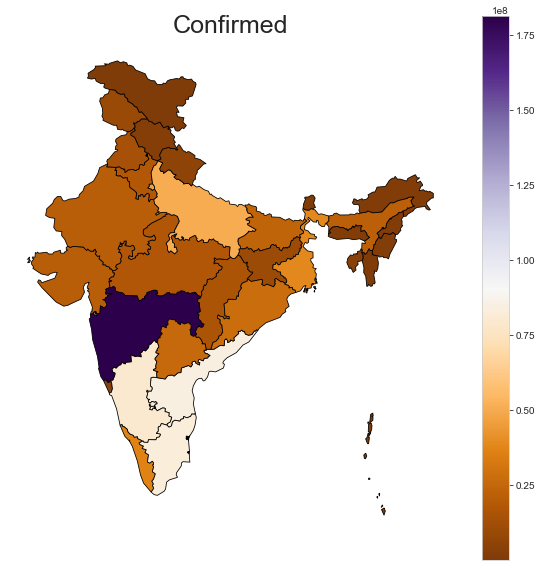

In [80]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('Confirmed',fontdict={'fontsize':'25','fontweight':'10'})
variable='Confirmed'
merged2.plot(column=variable,cmap='PuOr', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [81]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=merged['State/UnionTerritory'],
    z=merged['Confirmed'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Positive"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=5000000,
        dtick=50000000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Total Confirmed cases",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

### Intensity of all other pandemics that happened in India compared to COVID-19

In [82]:
epidemics=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/epidemics.csv")

In [83]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(epidemics.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=epidemics.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title="Intensity of the Epidemics that happened in India")
fig.show()

In [84]:
epidemics=epidemics.fillna(0)

In [85]:
trace1 = go.Scatter(
    x = epidemics["Epidemic"],
    y = epidemics["Cases"],
    mode = 'lines+markers',
    name = 'Cases',
    marker = dict(color = 'rgba(255, 51, 51, 0.5)'))

layout = dict(title = 'Intensity of the Epidemics for no. of cases recorded',
             xaxis= dict(zeroline= False)
             )

data = [trace1]
fig = dict(data = data, layout = layout)

iplot(fig)

In [86]:
trace2 = go.Scatter(
    x = epidemics["Epidemic"],
    y = epidemics["Deaths"],
    mode = 'lines+markers',
    name = 'Deaths',
    marker = dict(color = 'rgba(51, 102, 255, 0.5)'))

layout = dict(title = 'Intensity of the Epidemics for total no. of deaths recorded',
             xaxis= dict(zeroline= False)
             )

data = [trace2]
fig = dict(data = data, layout = layout)

iplot(fig)